## Immigrant Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
from pprint import pprint

## Age

In [2]:
age_file = os.path.join("Outputs", "Age.csv")
age_df = pd.read_csv(age_file, index_col=0)
age_df.head(11)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Under 5 years,300838,0,0
5 to 17 years,1715891,529699,0
18 to 24 years,1493048,1070434,273064
25 to 44 years,5403942,5837727,5165465
45 to 54 years,1091931,2019478,5666083
55 to 64 years,590534,938009,5301997
65 to 74 years,356549,408310,3595346
75 to 84 years,144848,187602,1934205
85 years and over,33426,55177,796437


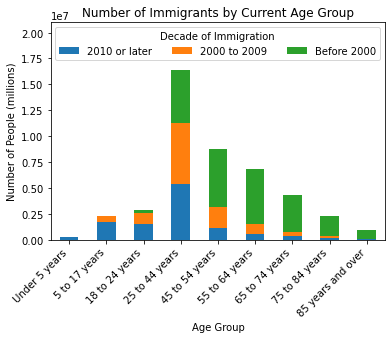

In [3]:
title = "Number of Immigrants by Current Age Group"
ylabel = "Number of People (millions)"
xlabel = "Age Group"
ylim = (0, 21_000_000)

age_df.plot.bar(stacked = True, title = title, ylim = ylim, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Immigration", ncol=3, loc="upper right")
plt.xticks(rotation=45, ha='right');

savename = "AgeGroups.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "AgeGroups.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

Notes:

1) The plot above shows current age group, not the age group at the time of immigration.
2) The age groups are broken down into unequal age ranges. The longest age range is "25 to 44 years" and is also the range with the highest number of people. 

In [4]:
age_df_T = age_df.transpose()

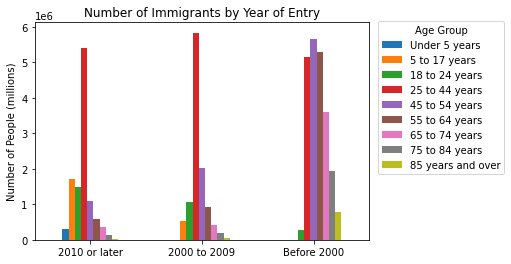

In [5]:
title = "Number of Immigrants by Year of Entry"
ylabel = "Number of People (millions)"

age_df_T.plot.bar(rot = 0, title = title, ylabel = ylabel);
plt.legend(bbox_to_anchor=(1.01,1.03), loc="upper left", title = "Age Group");

savename = "AgeGroupsDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "AgeGroupsDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')
#These plots show the age in 2020 of people who immigrated in various decades

## Continents

In [6]:
continent_file = os.path.join("Outputs", "Continents.csv")
continents_df = pd.read_csv(continent_file, index_col=0)
continents_df.head(6)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Europe,891372,860761,2912685
Asia,4323154,3233372,6553541
Africa,1013936,739372,728171
Oceania,100279,77248,113777
Latin America,4623992,5992222,11969315
Northern America,189417,132425,477862


In [17]:
#Calculate sum of each continent, and sum of all continents
total_continents = continents_df.sum(axis = 1)
total_world = continents_df.to_numpy().sum()

#Create properly labelled data frame
total_continents_df = total_continents.to_frame()
total_continents_df = total_continents_df.rename(columns={total_continents_df.columns[0]: "Number of Foreign Born"})
total_continents_df.index.name = "Continents"

#Find percentage of total for each continent
total_continents_df["Percentage of Total"] = total_continents_df["Number of Foreign Born"].div(total_world).multiply(100)

#Format table for human readability
total_continents_df["Number of Foreign Born"] = total_continents_df["Number of Foreign Born"].map("{:,.0f}".format)
total_continents_df["Percentage of Total"] = total_continents_df["Percentage of Total"].map("{:,.2f}%".format)

In [18]:
total_continents_df.head()

,Number of Foreign Born,Percentage of Total
Continents,,
Europe,"4,664,818",10.38%
Asia,"14,110,067",31.40%
Africa,"2,481,479",5.52%
Oceania,"291,304",0.65%
Latin America,"22,585,529",50.27%


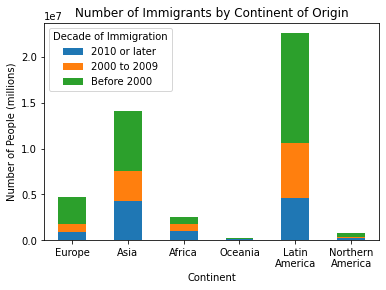

In [37]:
title = "Number of Immigrants by Continent of Origin"
ylabel = "Number of People (millions)"
xlabel = "Continent"

labels = ["Europe", "Asia", "Africa", "Oceania", "Latin\nAmerica", "Northern\nAmerica"]
ticks = np.arange(0, len(labels), 1)

continents_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel);
plt.legend(title="Decade of Immigration", ncol=1, loc="upper left")
plt.xticks(ticks, labels, rotation=0, ha='center');

savename = "Continent.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Continent.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [38]:
continents_df_T = continents_df.transpose()

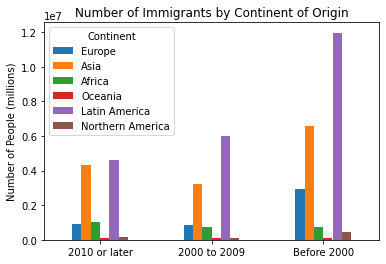

In [39]:
title = "Number of Immigrants by Continent of Origin"
ylabel = "Number of People (millions)"

continents_df_T.plot.bar(rot = 0, title = title, ylabel = ylabel);
plt.legend(loc="upper left", title = "Continent");

savename = "ContinentDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "ContinentDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Education 25+

In [40]:
edu_25p_file = os.path.join("Outputs", "Education 25+.csv")
edu_25p_df = pd.read_csv(edu_25p_file, index_col=0)

edu_25p_df.rename(index={"High school graduate (includes equivalency)": "High school graduate (or equivalent)"}, inplace = True)

edu_25p_df.head(5)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Less than high school graduate,617835,424745,215797
High school graduate (or equivalent),640244,355241,174474
Some college or associate's degree,489787,267203,156109
Bachelor's degree,800305,284193,125499
Graduate or professional degree,656250,214689,93359


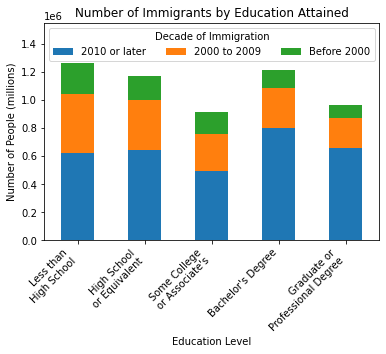

In [41]:
title = "Number of Immigrants by Education Attained"
ylabel = "Number of People (millions)"
xlabel = "Education Level"
ylim = (0, 1_550_000)

labels = ["Less than\nHigh School", "High School\nor Equivalent", "Some College\nor Associate's", "Bachelor's Degree", "Graduate or\nProfessional Degree"]
ticks = np.arange(0, len(labels), 1)

edu_25p_df.plot.bar(stacked = True, title = title, ylabel = ylabel, ylim = ylim, xlabel = xlabel);
plt.legend(title = "Decade of Immigration", ncol = 3, loc = "upper left")
plt.xticks(ticks, labels, rotation = 45, ha = 'right');

savename = "Education.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Education.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [42]:
edu_25p_T = edu_25p_df.transpose()

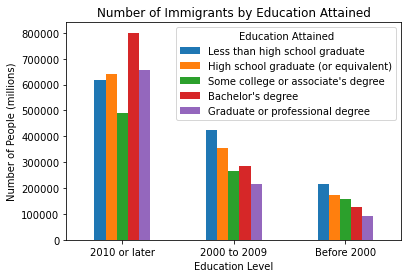

In [43]:
edu_25p_T.plot.bar(stacked = False, title = title, ylabel = ylabel, xlabel = xlabel, rot = 0);
plt.legend(title = "Education Attained", ncol = 1, loc = "upper right")

savename = "EducationDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "EducationDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Gender

In [44]:
gender_file = os.path.join("Outputs", "Gender.csv")
gender_df = pd.read_csv(gender_file, index_col=0)
gender_df.head(2)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Male,5470795,5285957,10899814
Female,5671354,5749443,11855538


## In School

The plots below have no context if we don't at some point note the total number of foreign-born individuals, as not all foreign-born individuals are currently attending school, but they all have a race, marital status, age, race, etc.

In [45]:
in_school_file = os.path.join("Outputs", "In School.csv")
in_school_df = pd.read_csv(in_school_file, index_col=0)
in_school_df.head(4)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
"Nursery school, preschool",99238,0,0
Elementary school (grades K-8),1181250,169898,7652
High school (grades 9-12),569817,444824,55097
College or graduate school,1350915,929805,702488


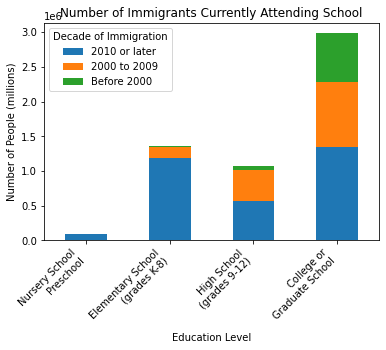

In [46]:
title = "Number of Immigrants Currently Attending School"
ylabel = "Number of People (millions)"
xlabel = "Education Level"

labels = ["Nursery School\nPreschool", "Elementary School\n(grades K-8)", "High School\n(grades 9-12)", "College or\nGraduate School"]
ticks = np.arange(0, len(labels), 1)

in_school_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title = "Decade of Immigration", ncol = 1, loc = "upper left")
plt.xticks(ticks, labels, rotation = 45, ha = 'right');

savename = "CurrentSchool.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "CurrentSchool.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [47]:
in_school_T = in_school_df.transpose()

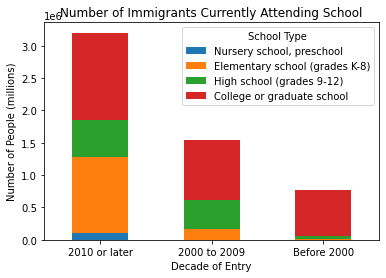

In [48]:
title = "Number of Immigrants Currently Attending School"
ylabel = "Number of People (millions)"
xlabel = "Decade of Entry"

#labels = ["Nursery School\nPreschool", "Elementary School\n(grades K-8)", "High School\n(grades 9-12)", "College or\nGraduate School"]
#ticks = np.arange(0, len(labels), 1)

in_school_T.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="School Type", ncol=1, loc="upper right")
plt.xticks(rotation=0, ha='center');

savename = "CurrentSchoolDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "CurrentSchoolDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Marital Status

In [49]:
marital_status_file = os.path.join("Outputs", "Marital Status.csv")
marital_status_df = pd.read_csv(marital_status_file, index_col=0)
marital_status_df.head(4)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Never married,3488317,3234679,3345037
"Now married, except separated",5232476,6274629,14404138
Divorced or separated,571855,1038559,3208505
Widowed,238273,270458,1797673


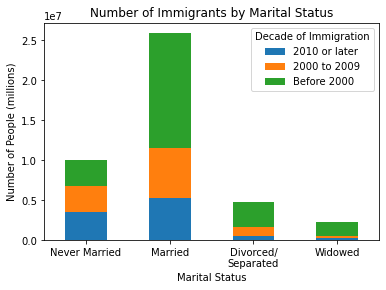

In [50]:
title = "Number of Immigrants by Marital Status"
ylabel = "Number of People (millions)"
xlabel = "Marital Status"

labels = ["Never Married", "Married", "Divorced/\nSeparated", "Widowed"]
ticks = np.arange(0, len(labels), 1)

marital_status_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Immigration", ncol=1, loc="upper right")
plt.xticks(ticks, labels, rotation=0, ha='center');

savename = "MaritalStatus.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "MaritalStatus.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [51]:
marital_status_T = marital_status_df.transpose()

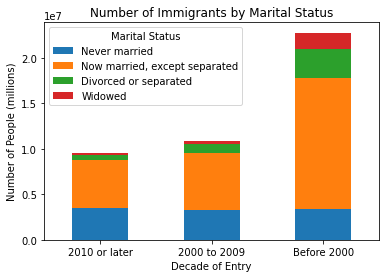

In [52]:
title = "Number of Immigrants by Marital Status"
ylabel = "Number of People (millions)"
xlabel = "Decade of Entry"

marital_status_T.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel);
plt.legend(title="Marital Status", ncol=1, loc="upper left");
plt.xticks(rotation=0, ha='center');

savename = "MaritalStatusDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "MaritalStatusDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Race

In [53]:
race_file = os.path.join("Outputs", "Race.csv")
race_df = pd.read_csv(race_file, index_col=0)
race_df.head(2)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
One race,10819027,10803657,22254734
Two or more races,323122,231743,500618


## One Race

In [54]:
one_race_file = os.path.join("Outputs", "One Race.csv")
one_race_df = pd.read_csv(one_race_file, index_col=0)
one_race_df.head(6)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
White,4378865,4855576,11104612
Black or African American,1348200,1158717,1820428
American Indian and Alaska Native,33426,44142,91021
Asian,3621198,2847133,5757104
Native Hawaiian and Other Pacific Islander,55711,44142,68266
Some other race,1370484,1842912,3390547


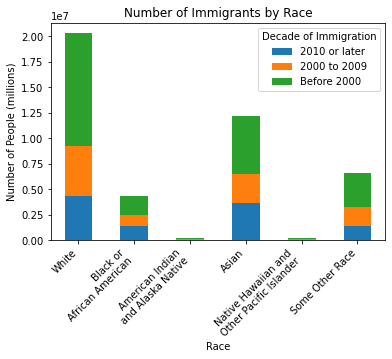

In [55]:
title = "Number of Immigrants by Race"
ylabel = "Number of People (millions)"
xlabel = "Race"

labels = ["White", "Black or\nAfrican American", "American Indian\nand Alaska Native", "Asian", "Native Hawaiian and\nOther Pacific Islander", "Some Other Race"]
ticks = np.arange(0, len(labels), 1)

one_race_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Immigration", ncol=1, loc="upper right")
plt.xticks(ticks, labels, rotation=45, ha='right');

savename = "Race.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Race.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [56]:
one_race_T = one_race_df.transpose()

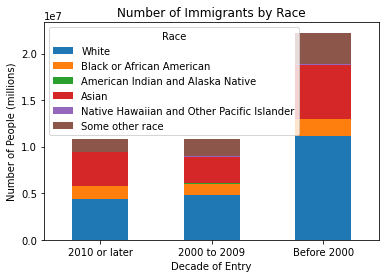

In [57]:
title = "Number of Immigrants by Race"
ylabel = "Number of People (millions)"
xlabel = "Decade of Entry"



one_race_T.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Race", ncol=1, loc="upper left")
plt.xticks(rotation=0, ha='center');

savename = "RaceDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "RaceDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## More Than One Race

"Two or more races" is on the same level as "Hispanic or Latino origin (of any race)" and "White alone, not Hispanic or Latino" in the original website's formatting.  The latter two are not a subset of the former.

Petition to change section to "White vs Hispanic in Origin"

In [58]:
more_than_one_race_file = os.path.join("Outputs", "More Than One Race.csv")
more_than_one_race_df = pd.read_csv(more_than_one_race_file, index_col=0)
more_than_one_race_df.head(2)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Hispanic or Latino origin (of any race),3988889,5352169,10512973
"White alone, not Hispanic or Latino",1883023,1533921,4391783


## Annual Perm Res

In [59]:
annual_perm_res_file = os.path.join("Outputs", "Annual Perm Res.csv")
annual_perm_res_df = pd.read_csv(annual_perm_res_file, index_col=0)
annual_perm_res_df.tail(11)

,Number of Legal Permanent Residents (millions)
Year,
2009,1.130818
2010,1.042625
2011,1.062040
2012,1.031631
2013,0.990553
2014,1.016518
2015,1.051031
2016,1.183505
2017,1.127167


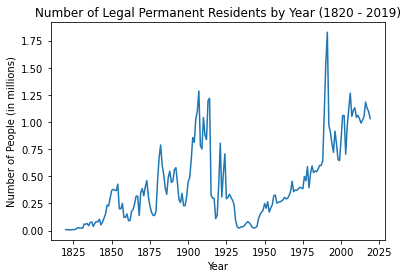

In [60]:
title = "Number of Legal Permanent Residents by Year (1820 - 2019)"
ylabel = "Number of People (in millions)"

annual_perm_res_df.plot.line(title = title, ylabel = ylabel, legend = False);

savename = "PermResYear.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "PermResYear.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')